In [2]:
import sys

sys.path.append("../python")

from data import Dataloader

In [3]:
from models import HeuristicModelSiameseNetwork as HeuristicModel

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

model = HeuristicModel()
model.fit(X, Y)




Epoch 1/50

3201/3201 [==============================] - 5s 1ms/step - loss: 0.6626 - val_loss: 0.6509
Epoch 2/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6501 - val_loss: 0.6519
Epoch 3/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6478 - val_loss: 0.6463
Epoch 4/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6466 - val_loss: 0.6445
Epoch 5/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6452 - val_loss: 0.6418
Epoch 6/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6443 - val_loss: 0.6406
Epoch 7/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6446 - val_loss: 0.6403
Epoch 8/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6437 - val_loss: 0.6384
Epoch 9/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0.6432 - val_loss: 0.6378
Epoch 10/50
3201/3201 [==============================] - 4s 1ms/step - loss: 0

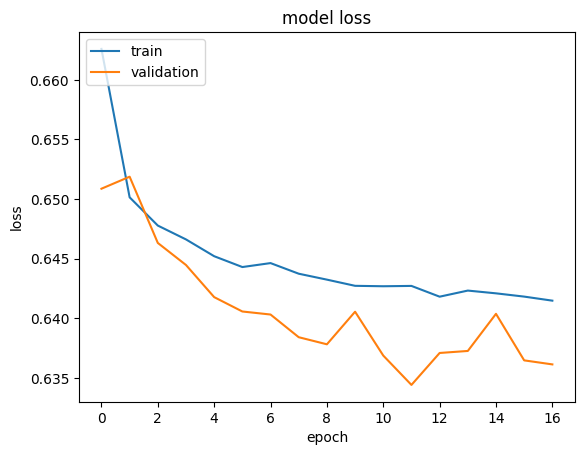

In [4]:
model.plot_history()

In [5]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))


1251/1251 [==============================] - 1s 682us/step
Percentage of explained preferences on train data: 0.6332433378331084


In [6]:
cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

1251/1251 [==============================] - 1s 716us/step
Percentage of preferences well regrouped into clusters: 0.3333166670833229


In [8]:
model.predict_utility(X)[:3, 0]

1251/1251 [==============================] - 1s 669us/step


array([0.50034475, 0.5003497 , 0.5427228 ], dtype=float32)

In [7]:
model.predict_preference(X[:4], Y[:4])

1/1 [==============================] - 0s 24ms/step


array([[0.47792718],
       [0.49994954],
       [0.34720036],
       [0.7108141 ]], dtype=float32)

In [ ]:
import sys

sys.path.append("../python")

from data import Dataloader
from models import HeuristicModelSiameseNetwork2 as HeuristicModel2

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

model = HeuristicModel2()
model.load_model_weights("./weights/heuristic_model_weights_2")

Poids chargés depuis ./weights/heuristic_model_weights_2\model_0.h5
Poids chargés depuis ./weights/heuristic_model_weights_2\model_1.h5
Poids chargés depuis ./weights/heuristic_model_weights_2\model_2.h5


In [11]:
model.predict_preference(X[8].reshape(1, -1), Y[8].reshape(1, -1))

1/1 [==============================] - 0s 16ms/step


array([[[0.7310075 ]],

       [[0.41201964]],

       [[0.34011748]]], dtype=float32)

In [12]:
model.predict_utility(X[8].reshape(1, -1))

1/1 [==============================] - 0s 16ms/step


array([[[0.7309728]]], dtype=float32)

In [13]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))

1251/1251 [==============================] - 1s 719us/step
Percentage of explained preferences on train data: 1.0


In [15]:
cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

1251/1251 [==============================] - 1s 668us/step


AssertionError: 